#Equipe 7


*  Gabriel Lenon Barros da Silva
*   Bruno Venceslau Barbosa
*   Carolina Queiroz de Sousa
*   Gustavo Miguel Ferreira da Silva
*  Pedro Henrique de Amaral lira






# Estratégias de Treinamento - Exercício

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
%matplotlib inline

# Usando o algoritmo PCA para diminuir a dimensionalidade



1.   Gere uma base de dados com make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)
4.   Faça a separação em treino e teste
5.   Utilize o algoritmo PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA e gere mais dois conjuntos de dados com 10 e 5 features, além dos dados originais
6.   Treine modelos de k-NN com os dados originais e os transformados
6.   Analise os resultados


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.746173,1.750256,0.534045,1.513022,0.745992,0.401336,-1.805243,0.591563,1.196765,-0.820507,0.709157,-1.374558,0.820606,-0.763090,-0.896966,-0.484647,-2.226047,-0.671329,-1.211403,0.259051
1,1.196280,0.591716,0.082717,0.748559,-0.410633,-0.444765,-0.040657,0.227772,1.423518,-0.576194,-0.952781,1.161625,1.113706,2.274434,0.009227,0.787489,-0.274138,2.035811,-0.978031,2.289213
2,-2.017231,1.933808,-1.498755,-0.401752,-0.059168,-0.617704,0.214460,1.139739,1.276880,0.511514,-2.013646,-0.991748,-2.113186,-0.014137,-1.563181,0.901865,0.618281,0.063033,-0.717898,-0.800905
3,-0.821435,-1.307879,-0.118141,0.812566,0.520145,1.089331,-0.251253,0.276556,-0.165491,0.259576,0.452430,0.484354,1.405406,-1.788562,1.134168,-0.516726,1.130520,-1.281876,1.611351,0.662620
4,0.460563,0.304735,1.743974,-0.164564,-1.225236,-1.031973,-1.476970,-0.771503,-1.015393,1.572609,-1.094883,0.622019,0.214341,0.145393,0.699119,-0.303463,-0.375053,0.381186,-2.088375,0.004993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-0.862489,-0.611661,1.771168,1.320265,0.739290,-2.446273,-1.169451,-0.632724,0.877774,0.812357,1.400493,-0.061521,0.482243,-1.793730,0.382547,-0.362323,0.644932,0.317288,0.962209,-0.352676
696,1.485129,1.420913,1.136707,-0.016259,0.754760,-0.328982,-0.870931,0.579502,-0.502805,-1.490955,-0.208155,0.512479,-1.140031,2.924960,-0.134927,-0.209496,0.325471,1.605878,-1.915867,-1.690392
697,-2.202480,1.708829,-1.845695,0.822154,-0.120904,-0.808664,1.695300,1.325720,0.834589,1.243157,1.084708,0.486384,-1.692873,-0.547574,0.712210,-0.016794,-0.731172,-0.945417,0.476157,1.029263
698,-0.508614,-1.013156,0.861456,0.292504,-0.535545,-0.085547,-1.256189,-1.000523,0.301720,0.718163,1.309752,-0.257740,-1.190649,-1.039384,-0.079066,1.075915,0.835428,1.223829,0.954858,-1.223432


## Utilizando o algoritmo PCA

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

print("Variância total mantida:", sum(pca_95.explained_variance_ratio_))


Variância total mantida: 0.9693392271022706


In [ ]:
X_train_pca.shape

(700, 19)

Com 10 features

In [ ]:
pca_10 = PCA(n_components=10)
X_train_10 = pca_10.fit_transform(X_train)
X_test_10 = pca_10.transform(X_test)

In [ ]:
X_train_10.shape

(700, 10)

Com 5 features

In [ ]:
pca_5 = PCA(n_components=5)
X_train_5 = pca_5.fit_transform(X_train)
X_test_5 = pca_5.transform(X_test)

In [ ]:
X_train_5.shape

(700, 5)

## Treinando os modelos com todas as features (19), com 10 e 5 do PCA

Todas as features

In [ ]:
knn_full_model = KNeighborsClassifier()
knn_full_model.fit(X_train, y_train)
predictions_full = knn_full_model.predict(X_test)
knn_full = classification_report(y_test, predictions_full, output_dict=True)

Todas 10 features

In [ ]:
knn_10_model = KNeighborsClassifier()
knn_10_model.fit(X_train_10, y_train)
predictions_10 = knn_10_model.predict(X_test_10)
knn_10 = classification_report(y_test, predictions_10, output_dict=True)

Todas 5 features

In [ ]:
knn_5_model = KNeighborsClassifier()
knn_5_model.fit(X_train_5, y_train)
predictions_5 = knn_5_model.predict(X_test_5)
knn_5 = classification_report(y_test, predictions_5, output_dict=True)

## Analisando os resultados dos experimentos

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

Com todas as features

In [ ]:
print("=== Todas as features ===")
print(classification_report(y_test, predictions_full))

=== Todas as features ===
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       152
           1       0.75      0.81      0.78       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



Com 10 features

In [ ]:
print("=== 10 features (PCA) ===")
print(classification_report(y_test, predictions_10))

=== 10 features (PCA) ===
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       152
           1       0.77      0.80      0.78       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



Com 5 features

In [ ]:
print("=== 5 features (PCA) ===")
print(classification_report(y_test, predictions_5))

=== 5 features (PCA) ===
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       152
           1       0.80      0.83      0.81       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



## Obtenha os dados
** Leia o arquivo csv 'Arvore_Decisao_Iris_Data.csv' em um DataFrame **

In [ ]:
url = "https://raw.githubusercontent.com/Bruno-Venceslau/dataset-modelos_preditivos/refs/heads/main/Arvore_Decisao_Iris_Data%20-%20Arvore_Decisao_Iris_Data.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [ ]:
df.columns = columns

Convertendo o target em labels numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df['class_numero'] = le.fit_transform(df['class'])

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,class_numero
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_numero
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class_numero']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(111, 4) (38, 4)
(111,) (38,)


# Normalização as variáveis

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
X_test_scaled = scaler.transform(X_test)

# Usando o algoritmo Random Forest como Feature Selection

Importe o RandomForestClassfier e SelectFromModel do scikit learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test_scaled)

Analisando a accuracy:

In [ ]:
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.6f}")

Acurácia: 1.000000


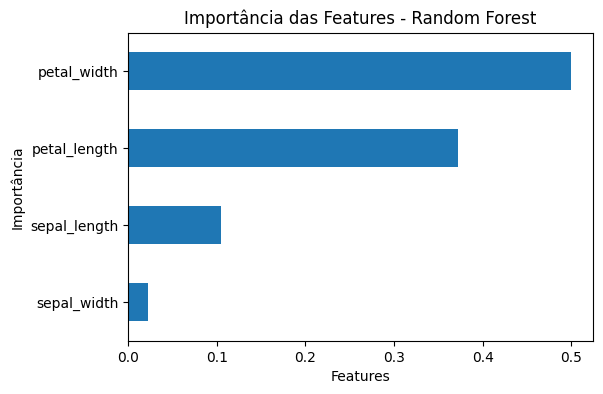

In [ ]:
feat_importances = pd.Series(clf.feature_importances_, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(6,4))
feat_importances.plot(kind='barh')
plt.title("Importância das Features - Random Forest")
plt.ylabel("Importância")
plt.xlabel("Features")
plt.show()

Referência: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel (sklearn)

In [ ]:
sfm = SelectFromModel(estimator=clf)
sfm.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [ ]:
feature_names = X_train.columns
selected_features = sfm.get_support()
print(selected_features)
selected_feature_names = [name for name, selected in zip(feature_names, selected_features) if selected]
print("Colunas Selecionadas:", selected_feature_names)

[False False  True  True]
Colunas Selecionadas: ['petal_length', 'petal_width']


In [ ]:
print(selected_features.sum())

2


## Validação Cruzada com k-NN

### Aplique a validação cruzada para as bases de dados utilizadas neste exercício

Utilize o conjunto de dados com todas as features gerados a partir do sklearn. Primeira parte dos exercícios com PCA.

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

In [ ]:
logistic_regression_model = LogisticRegression(max_iter=1000)

#### Dados **gerados com a função da base de dados gerada pelo sklearn**

In [ ]:
results = {}

k=3

In [ ]:
stratified_k_fold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(logistic_regression_model, X, y, cv=stratified_k_fold, scoring='f1')

In [ ]:
results[3] = scores.mean()

k=5

In [ ]:
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(logistic_regression_model, X, y, cv=stratified_k_fold, scoring='f1')

In [ ]:
results[5] = scores.mean()

k=10

In [ ]:
stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
scores = cross_val_score(logistic_regression_model, X, y, cv=stratified_k_fold, scoring='f1')

In [ ]:
results[10] = scores.mean()

Para os valores de k utilizados acima, considerando a métrica de f1-score e a média do valor de f1-score em cada iteração da validação cruzada, o melhor valor foi de k=5 (70,7%)

In [ ]:
results

{3: np.float64(0.6973028179023831),
 5: np.float64(0.7070470508589322),
 10: np.float64(0.7023119412660843)}

In [ ]:
best_k = max(results, key=results.get)
print(f"Melhor k: {best_k} (f1-score médio = {results[best_k]:.4f})")

Melhor k: 5 (f1-score médio = 0.7070)


Classification Report do modelo treinado com o melhor valor de k

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
best_stratified_k_fold = StratifiedKFold(n_splits=best_k, shuffle=True, random_state=42)
best_stratified_k_fold

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_regression_model.predict(X_test)

In [ ]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.74      0.72       101\n           1       0.72      0.69      0.70        99\n\n    accuracy                           0.71       200\n   macro avg       0.72      0.71      0.71       200\nweighted avg       0.72      0.71      0.71       200\n'

#### Dados **Iris**

Ponto extra

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df_iris_full = pd.read_csv('https://raw.githubusercontent.com/Bruno-Venceslau/dataset-modelos_preditivos/refs/heads/main/Arvore_Decisao_Iris_Data%20-%20Arvore_Decisao_Iris_Data.csv', header=None, names=colunas)


df_subset = df_iris_full.groupby('class').head(37)

X = df_subset.drop('class', axis=1)
y = df_subset['class']

knn = KNeighborsClassifier(n_neighbors=1)
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=111)

cv_scores = cross_val_score(knn, X, y, cv=stratified_k_fold, scoring='accuracy')

print("Array de scores obtido:")
print(cv_scores)

Array de scores obtido:
[0.86956522 0.95454545 1.         1.         0.86363636]


In [ ]:
score = []
for i in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(knn, X, y, cv=5)
    score.append(cv_scores.mean())

score_array = np.array(score)

final_score = round(score_array.mean() * 100, 2)
print("Score final:", final_score)

Score final: 94.04


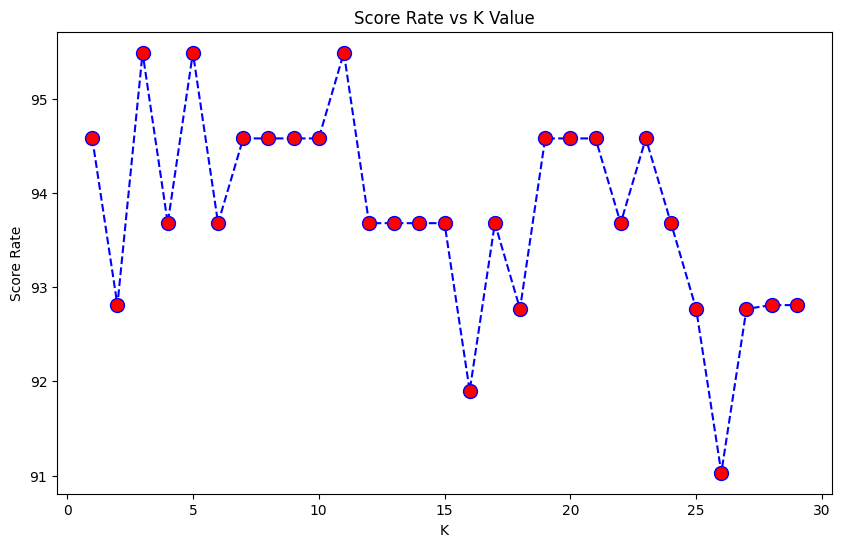

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

score = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
  cv_scores = cross_val_score(knn, X, y, cv=stratified_k_fold, scoring='accuracy')
  score.append(round((cv_scores.mean()*100), 2))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')
plt.show()

In [ ]:
best_k_index = np.argmax(score)
best_k_value = range(1, 30)[best_k_index]
best_score = score[best_k_index]

print(f"O melhor valor de k baseado no gráfico é: {best_k_value} com uma taxa de score de {best_score:.2f}%")

O melhor valor de k baseado no gráfico é: 3 com uma taxa de score de 95.49%


Classification Report do modelo treinado com o melhor valor de k

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111, stratify=y)


knn_best = KNeighborsClassifier(n_neighbors=best_k_value)
knn_best.fit(X_train, y_train)


y_pred = knn_best.predict(X_test)


print("=== Classification Report (Melhor k - Iris Dataset) ===")
print(classification_report(y_test, y_pred))

=== Classification Report (Melhor k - Iris Dataset) ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.78      0.88         9

       accuracy                           0.93        28
      macro avg       0.94      0.93      0.92        28
   weighted avg       0.94      0.93      0.93        28



## Conclusão

Com base nos resultados dos experimentos:

**PCA (Redução de Dimensionalidade):**

*   Ao aplicar PCA para reduzir a dimensionalidade para 10 e 5 features nos dados gerados com `make_classification`, observamos que a acurácia e o f1-score do modelo k-NN treinado com 10 features (0.78) foram semelhantes aos dados originais com 19 features (0.78). No entanto, a redução para 5 features resultou em uma leve melhoria na acurácia e f1-score (0.81). Isso sugere que a PCA pode ser útil para manter o desempenho do modelo enquanto reduz a complexidade dos dados, e em alguns casos, pode até melhorar o desempenho ao remover ruído.

**Feature Selection com Random Forest:**

*   A análise da importância das features usando Random Forest no dataset Iris indicou que 'petal_length' e 'petal_width' foram as features mais importantes para a classificação. A utilização do `SelectFromModel` confirmou que apenas essas duas features foram selecionadas. O modelo Random Forest treinado com todas as features alcançou uma acurácia de 1.00, o que pode indicar um possível overfitting ou que o dataset Iris é facilmente separável com todas as features. A seleção de features pode ser benéfica para modelos mais simples ou em datasets com muitas features irrelevantes, mas neste caso específico, o modelo com todas as features teve um desempenho perfeito (no conjunto de teste utilizado para a métrica).

**Validação Cruzada (Cross-Validation):**

*   A validação cruzada com `StratifiedKFold` nos dados gerados com `make_classification` foi utilizada para avaliar o modelo de Regressão Logística com diferentes valores de k (3, 5 e 10). A métrica f1-score médio foi calculada para cada k. Os resultados mostraram que k=5 obteve o melhor f1-score médio (0.7070), indicando que este valor de k proporcionou um desempenho de generalização ligeiramente melhor para este modelo específico e conjunto de dados. A validação cruzada é crucial para obter uma estimativa mais robusta do desempenho do modelo e para a seleção de hiperparâmetros como o k no k-NN ou o número de folds na validação cruzada.

**Considerações Gerais:**

*   A escolha entre PCA e Feature Selection depende do objetivo. PCA cria novas features que são combinações lineares das originais, enquanto Feature Selection seleciona um subconjunto das features originais.
*   A validação cruzada é uma técnica fundamental para avaliar a performance de modelos de forma mais confiável, evitando o overfitting e fornecendo uma melhor estimativa de como o modelo se comportará em dados não vistos.